# Приоритизация гипотез и Анализ A/B-теста

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.<br>
**Задача**: Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.<br>

Выборка: 9 гипотез по увеличению выручки интернет-магазина<br>
Результаты А/В-теста.<br>

**Описание данных**:<br>
Таблица **hypothesis** (информация о гипотезах):<br>
Hypothesis — краткое описание гипотезы;<br>
Reach — охват пользователей по 10-балльной шкале;<br>
Impact — влияние на пользователей по 10-балльной шкале;<br>
Confidence — уверенность в гипотезе по 10-балльной шкале;<br>
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.<br>
costs — затраты на этот рекламный источник в этот день<br>
Таблица **orders** (информация о заказах):<br>
transactionId — идентификатор заказа;<br>
visitorId — идентификатор пользователя, совершившего заказ;<br>
date — дата, когда был совершён заказ;<br>
revenue — выручка заказа;<br>
group — группа A/B-теста, в которую попал заказ.<br>
Таблица **visitors** (информация о посещениях сайта):<br>
date — дата;<br>
group — группа A/B-теста;<br>
visitors — количество пользователей в указанную дату в указанной группе A/B-теста<br>

Необходимо провести ииследование, и принять решение по результатам А/В-теста и объяснить его.

In [1]:
#Библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
#Загрузка данных

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

## Приоритизация гипотез

In [3]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.columns = [col.lower() for col in hypothesis.columns]
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

print(hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Наиболее перспективные гипотезы: 8,0,7,6.

In [5]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

print(hypothesis[['hypothesis','RICE']].sort_values(by='RICE',ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


In [6]:
top = [7,2,0,6]
for element in top:
    print(hypothesis['hypothesis'][element])

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


Перспективные гипотезы: 7,2,0,6. Приоретизация изменилась из-за добавления параметра охвата (reach) при расчете приоритета. У данных гипотез высокий показатель охвата, поэтому они находятся в ТОПе приоретета.

## Анализ A/B-теста

In [7]:
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Произведен обзор данных, пропуски отсутствуют.

In [9]:
#сбор агрегированных кумулятивных данных о транзакциях по дням
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = (datesGroups\
.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique
    , 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group']))

visitorsAggregated = datesGroups\
.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

         date group  transactions  buyers  revenue  visitors
0  2019-08-01     A            24      20   148579       719
1  2019-08-01     B            21      20   101217       713
2  2019-08-02     A            44      38   242401      1338
3  2019-08-02     B            45      43   266748      1294
4  2019-08-03     A            68      62   354874      1845


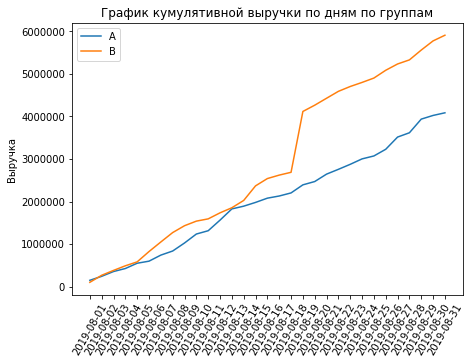

In [10]:
#объединение данных о выручке и транзакциях по группам и построение графика кумулятивной выручки
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactions']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactions']]

plt.figure(figsize=(7,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по дням по группам')
plt.ylabel('Выручка')

plt.xticks(rotation=60) 
plt.legend()


plt.show()

В середине теста наблюдается резкий скачок кумулятивной выручки. Группа B показывает более высокие показатели на протяжении всего теста. Возможно, в данных присутствуют аномально большие транзакции.

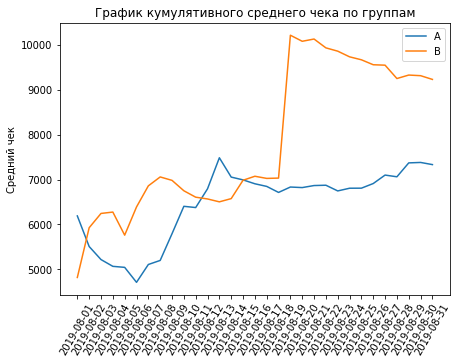

In [11]:
#построение графика кумулятивного среднего чека
plt.figure(figsize=(7,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')

plt.xticks(rotation=60) 
plt.legend()

plt.show()

Кумулятивное значение среднего чека продолжает колебаться. Наблюдается резкий скачек среднего чека в группе B, что говорит о возможных выбросах в данных. Принимать решение по этой метрике рано.

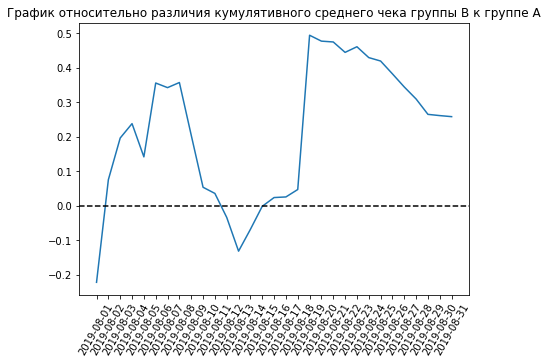

In [12]:
#объедиение таблиц коммулятивных выручек для построения графика относительно различия кумулятивного среднего чека
mergedCumulativeRevenue = cumulativeRevenueA\
.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(7,5))
(plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/
mergedCumulativeRevenue['transactionsB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1))

plt.title('График относительно различия кумулятивного среднего чека группы B к группе A')

plt.xticks(rotation=60) 

plt.axhline(y=0, color='black', linestyle='--')
plt.show()

По графику видно, что результаты теста значительно и резко менялись несколько раз. Видимо, именно в эти даты были произведены аномальные транзакции.

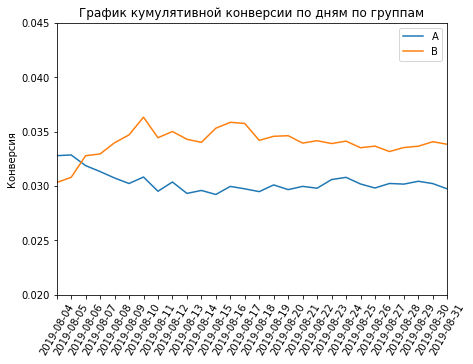

In [14]:
#добавление отношениея числа заказов к количеству пользователей в указанной группе в указанный день
cumulativeData['conversion'] = cumulativeData['transactions']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(7,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивной конверсии по дням по группам')
plt.ylabel('Конверсия')

plt.xticks(rotation=60) 
plt.legend()
plt.axis(['2019-08-04', '2019-08-31', 0.02, 0.045])

plt.show()

В начале теста наблюдаются скачки конверсии, но постепенно графики фиксируются около одного значения, причем конверсия группы B зафиксировалась выше чем у группы А. Значение колебаний не слишком большое - около 1%.

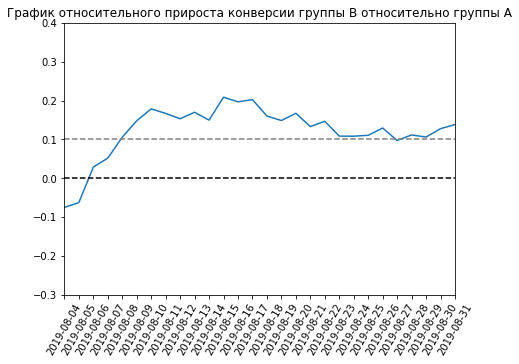

In [15]:
#обединение таблиц с коммулятивными данными для расчета конверсии
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(7,5))
(plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1))

plt.title('График относительного прироста конверсии группы B относительно группы A')

plt.xticks(rotation=60) 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(['2019-08-04', '2019-08-31', -0.3, 0.4])

plt.show()

Почти с самого начала теста группа В лидирует по конверсии. Значение прироста зафиксировалось около 10% (или продолжает рости).

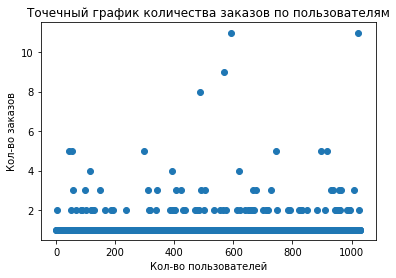

In [112]:
transactionsByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False)\
.agg({'transactionId' : pd.Series.nunique})
transactionsByUsers.columns = ['visitorId','transactions']

x_values = pd.Series(range(0,len(transactionsByUsers)))

plt.scatter(x_values, transactionsByUsers['transactions'])

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')

plt.show()

Пользователей, совершивших более двух транзакций очень мало. Необходимо определить являются ли 2 покупки нормой.

In [113]:
print(np.percentile(transactionsByUsers['transactions'], [95, 99]))

[2. 4.]


95% пользователей совершает не более 2 заказов, 99% пользователей не более 4.

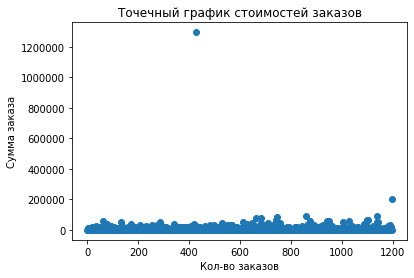

In [114]:
x_values_revenue = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values_revenue, orders['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Кол-во заказов')
plt.ylabel('Сумма заказа')

plt.show()

Основной пул транзакций в диапазоне менее 200 000. Есть выбросы в районе 200 000 и 1 200 000.

In [115]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


95% пользователей совершает покупки на сумму менее чем 28000, 99% пользователей не более 58233.2.

In [19]:
#разбивка групп пользователей и заказов по дням
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visкitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

#переменные для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

#создание списоков с количеством заказов для каждого из пользователей
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
.sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
.sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value =',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('относительное различие в конверсии между группами =',"{0:.3f}".format((data['ordersPerDateB']\
.sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-value = 0.00840
относительное различие в конверсии между группами = 0.138


P-value значительно меньше 0.05 - это значит что в конверсии между группами есть статистические различия.
Относительный прирост конверсии группы В к конверсии группы А равен 13.8%.

In [21]:
print('p-value =',"{0:.3f}".format(stats\
                       .mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительное различие среднего чека между группами =',"{0:.3f}".format(orders[orders['group']=='B']['revenue']\
                       .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.365
относительное различие среднего чека между группами = 0.259


P-value значительно больше 0.05 - статистические различий в средних чеках нет.
Относительный различие среднего чека группы В к конверсии группы А достаточно высокое - 25.9%.

In [22]:
#очистка данных от выбросов
usersWithManyOrders = (pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0))
usersWithExpensiveOrders = orders[orders['revenue'] > 32000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']\
.isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                                              .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']\
.isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
                                                              .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print('p-value =',"{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительное различие в конверсии между группами =',"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.00529
относительное различие в конверсии между группами = 0.179


Результат очищенных данных повторяет результат предыдущего теста (с необработанными данными). Сегмент В лучше сегмента А (прирост на 17.9%).

In [119]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.430
0.011


P-value значительно больше 0.05 - статистические различий в средних чеках нет.
Однако, после очистки данных относительное различие среднего чека группы В к конверсии группы А уменьшилось до 1.1%.

## Общий вывод

В рамках исследования были рассмотренны данные о гипотезах и результатах А/В тестов.

В рамках обзора гипотез были выбраны как наиболее приоритетыне гипотезы:

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Так же, были проанализированны результаты А/В теста. 

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.<br>
По сырым данным и после удаления аномалий - нет статистически значимого различия по среднему чеку между группами.

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту.<br>
График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Конверсия сегмента В лучше сегмента А (прирост на 17.9%).

В данной ситуации рекомендуется **остановить тест**, так как конверсия группы В выше гем у группы (при отсутствии статистических различий в среднем чеке).